In [30]:
import torch
import numpy as np
import glob
import os
import matplotlib.pyplot as plt

In [118]:
paths = glob.glob('r.*')
last = sorted(glob.glob('r.*'), key=lambda x : x.lstrip('r.'))[-1] + '/'

runs = []
for file in glob.glob(last + '*.pyT'):
    runs.append(torch.load(file))
    
params = torch.load(last+'params.pkl')
params

{'noise': array([0.001, 0.01 , 0.1  ]),
 'lr': [0.01],
 'n': [1, 10, 100],
 'd': [1, 10, 100],
 'seed': range(0, 1)}

In [137]:
constraints = {}
constraints['d'] = 1
constraints['n'] = 100

selected_runs = []
for irun, run in enumerate(runs):
    keep = True
    for k,v in constraints.items():
        if getattr(run['args'],k) != v:
            keep = False
            break
    if keep:
        selected_runs.append(run)
print(len(runs),len(selected_runs))

27 3


[  1   2   3   4   5   6   8  11  14  18  23  29  37  48  61  78 100]
[  1   2   3   4   5   6   8  11  14  18  23  29  37  48  61  78 100]
[  1   2   3   4   5   6   8  11  14  18  23  29  37  48  61  78 100]


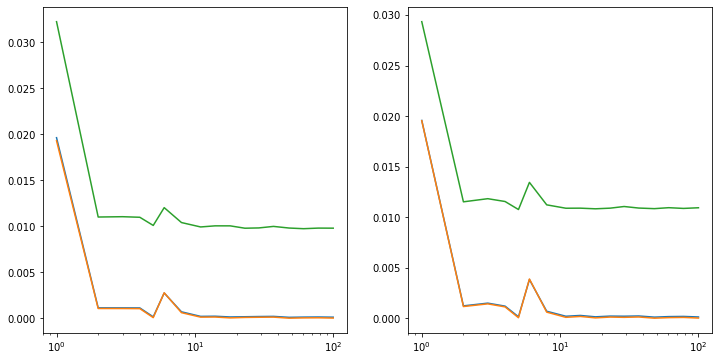

In [138]:
fig, axarr = plt.subplots(1,2, figsize=(12,6))
for run in selected_runs:
    args = run['args']
    widths = run['widths']
    print(widths)
    train_losses = run['train_loss']
    test_losses = run['test_loss']
    axarr[0].plot(widths, train_losses)
    axarr[1].plot(widths, test_losses)
for ax in axarr:
    ax.set_xscale('log')
    #ax.set_yscale('log')